
# Heart Failure Prediction Dataset


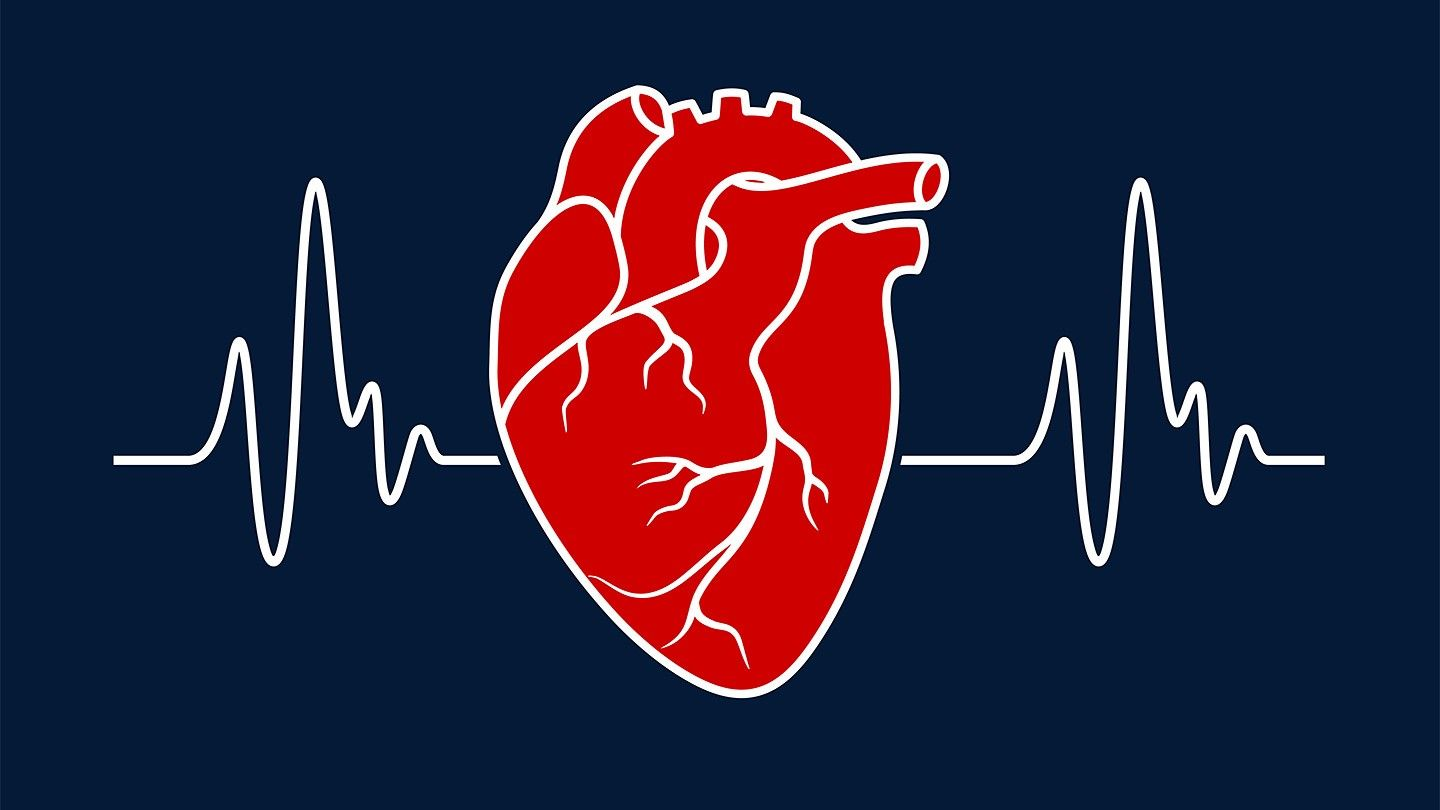

In [43]:
from IPython.display import Image
Image(filename='heart-failure.jpg')

## Project Description

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 

Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 

Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

## atribute information

*Age: age of the patient [years]

*Sex: sex of the patient [M: Male, F: Female]

*ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

*RestingBP: resting blood pressure [mm Hg]

*Cholesterol: serum cholesterol [mm/dl]

*FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

*RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

*MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

*ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

*Oldpeak: oldpeak = ST [Numeric value measured in depression]

*ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

*HeartDisease: output class [1: heart disease, 0: Normal]  ==> target

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#import data

data = pd.read_csv("heart.csv",delimiter=",")

In [46]:
# top 10 rows 

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [47]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

###### The dataset contain 4  categorical features 

In [48]:
# statistical distribution of various features

data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


In [49]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [50]:
data.isnull().values.any()

False

##### => The dataset do not contain any NaN values.

## Categorical to Numerical

In [51]:
#replace male as 0 and female as 1

data["Sex"] = data["Sex"].map({"M": 0, "F":1})

In [52]:
#Label Encoder Function

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data["ChestPainType"] = LE.fit_transform(data["ChestPainType"].values)

In [53]:
data["RestingECG"] = LE.fit_transform(data["RestingECG"].values)

In [54]:
data["ExerciseAngina"] = LE.fit_transform(data["ExerciseAngina"].values)

In [55]:
data["ST_Slope"] = LE.fit_transform(data["ST_Slope"].values)

In [56]:
# Number of elements for HeartDisease per category

print(data.HeartDisease.value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


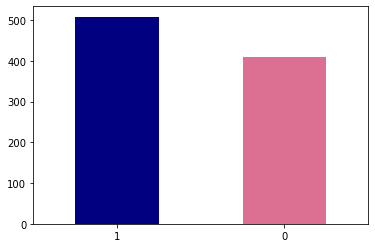

In [57]:
# count plot of the HeartDisease

c= data.HeartDisease.value_counts().plot(kind='bar',color=['navy','palevioletred'] , rot = 0)

In [58]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


In [59]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,-0.055750,1.000000,0.126559,-0.005133,0.200092,-0.120076,-0.071552,0.189186,-0.190664,-0.105734,0.150693,-0.305445
ChestPainType,-0.077150,0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,-0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,-0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,-0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,-0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


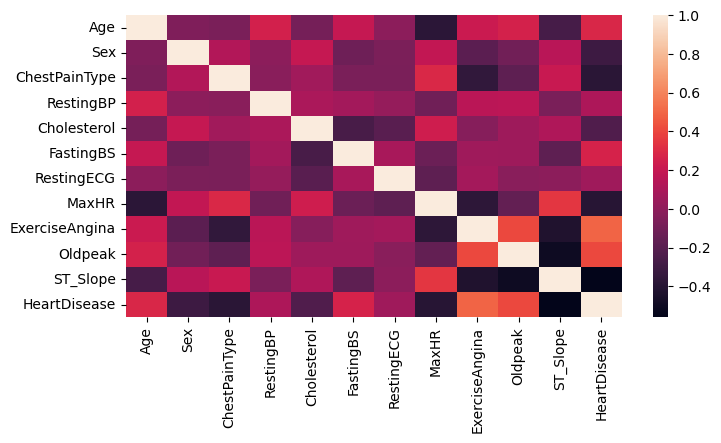

In [60]:
# correlation analysis using heatmap

plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(data.corr());

###### ==>  There are 2 features " ExerciseAngina " and " Oldpeak (Numeric value measured in depression) " which are correlated to our target " HeartDisease " 

<AxesSubplot:>

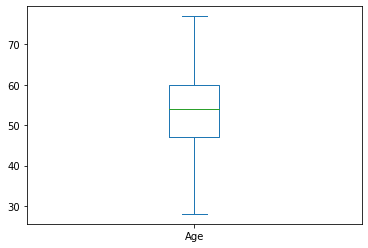

In [61]:
import matplotlib as plt
data["Age"].plot.box()

In [62]:
data.groupby(by=['Sex']).mean()['HeartDisease']

Sex
0    0.631724
1    0.259067
Name: HeartDisease, dtype: float64

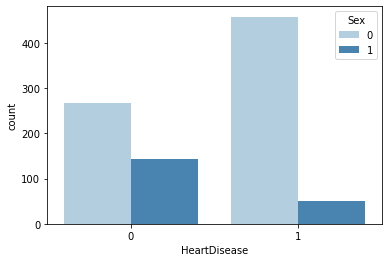

In [63]:
sns.color_palette()


ax = sns.countplot(x='HeartDisease',hue = 'Sex' ,data=data, palette='Blues')

###### ==> Males are more likely than females to have Heart failure

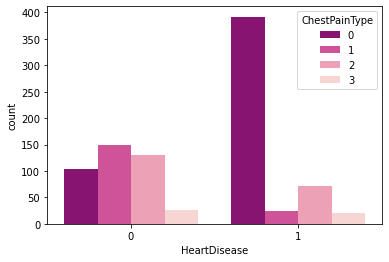

In [64]:
hc= sns.countplot(x='HeartDisease', hue='ChestPainType', data=data, palette='RdPu_r')


###### ==> 0 i.e ASY : Asymptomatic is the most frequent type of chest pain among patients 

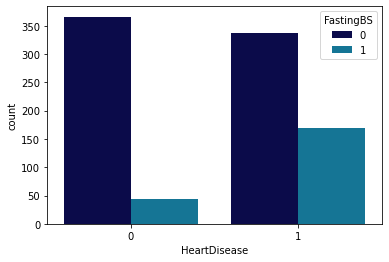

In [65]:
hf= sns.countplot(x='HeartDisease', hue='FastingBS', data=data, palette='ocean')

###### ==> People who have fasting blood sugar are more likely to be ill

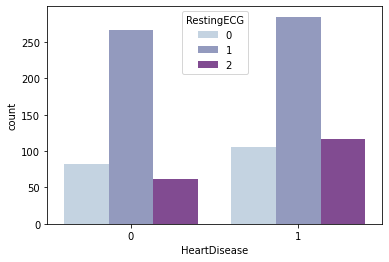

In [66]:
hr= sns.countplot(x='HeartDisease', hue='RestingECG', data=data, palette='BuPu')

###### ==> This plot shows that the percentage of electrocardiogram having wave abnormality " 2 " or showing probable or definite left ventricular hypertrophy " 0 ", increase for people who have Heart Disease.

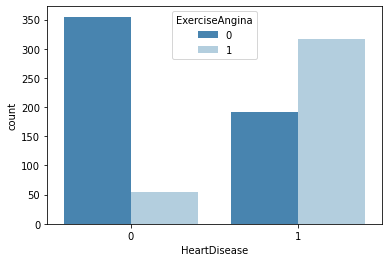

In [67]:
he= sns.countplot(x='HeartDisease', hue='ExerciseAngina', data=data, palette='Blues_r')

###### ==> People who have Heart Disease get Angina pectoris caused by exercise " ExerciseAngina : 0 = No , 1 = Yes "

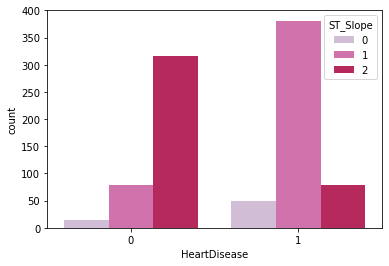

In [68]:
hs= sns.countplot(x='HeartDisease', hue='ST_Slope', data=data, palette='PuRd')

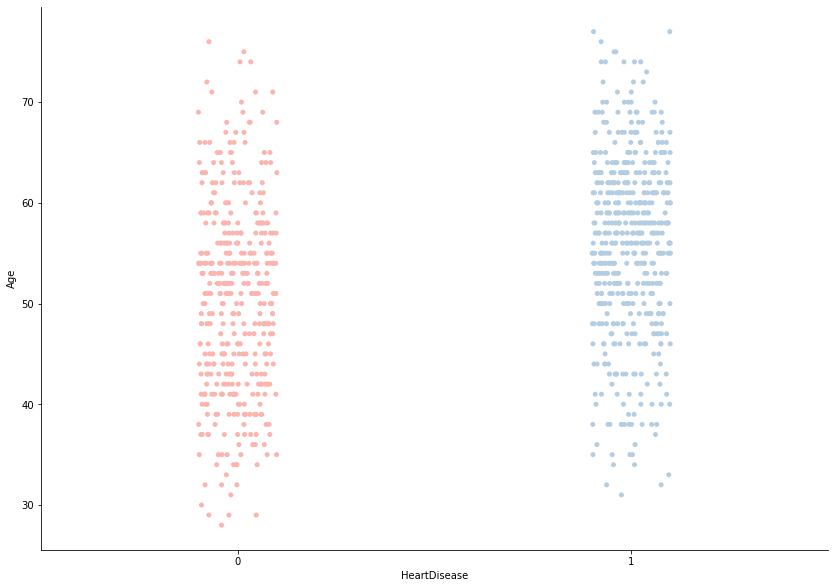

In [69]:
ha = sns.catplot(x="HeartDisease", y="Age", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

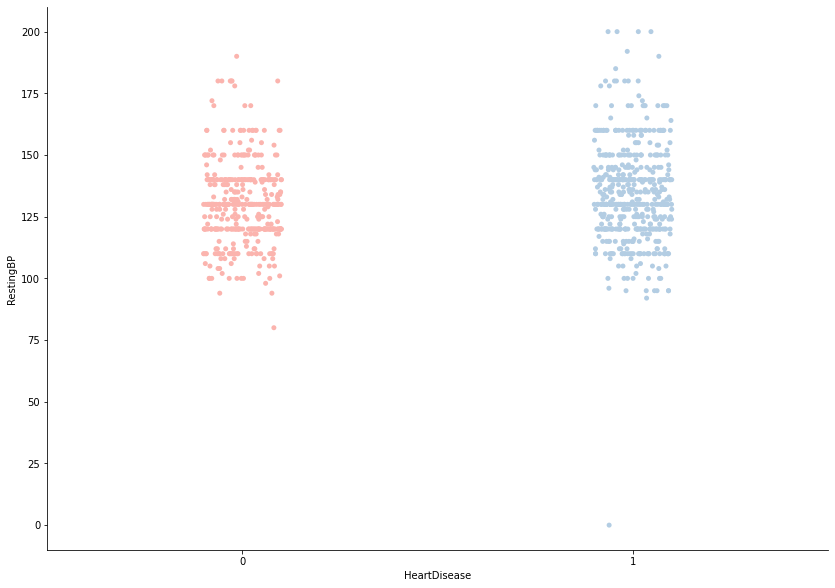

In [70]:
ha = sns.catplot(x="HeartDisease", y="RestingBP", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

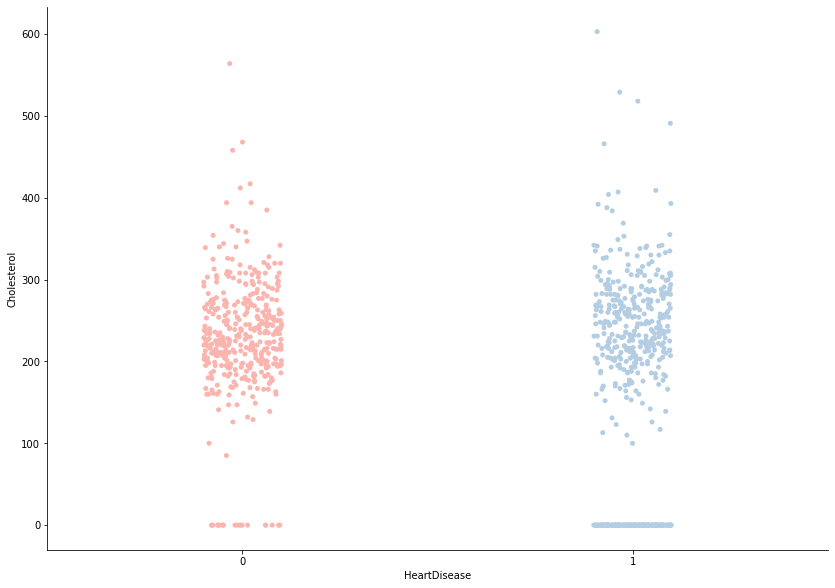

In [71]:
ha = sns.catplot(x="HeartDisease", y="Cholesterol", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

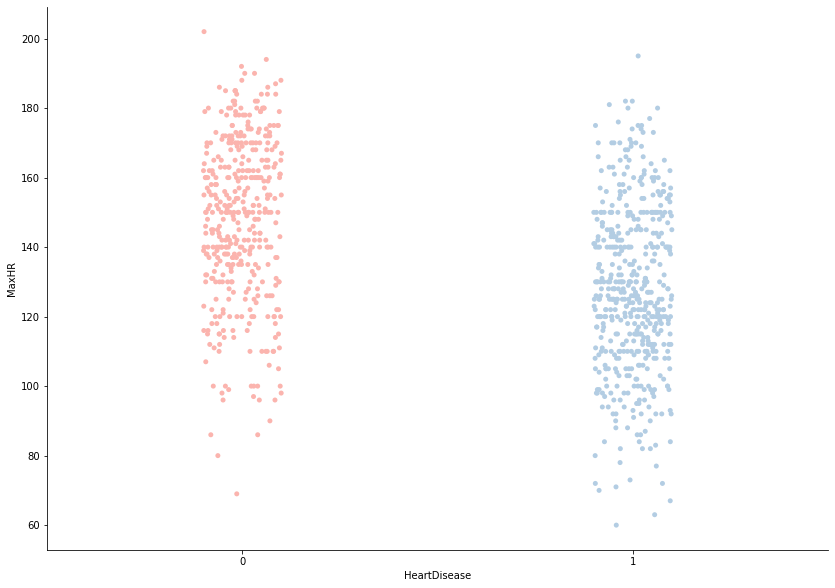

In [72]:
ha = sns.catplot(x="HeartDisease", y="MaxHR", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

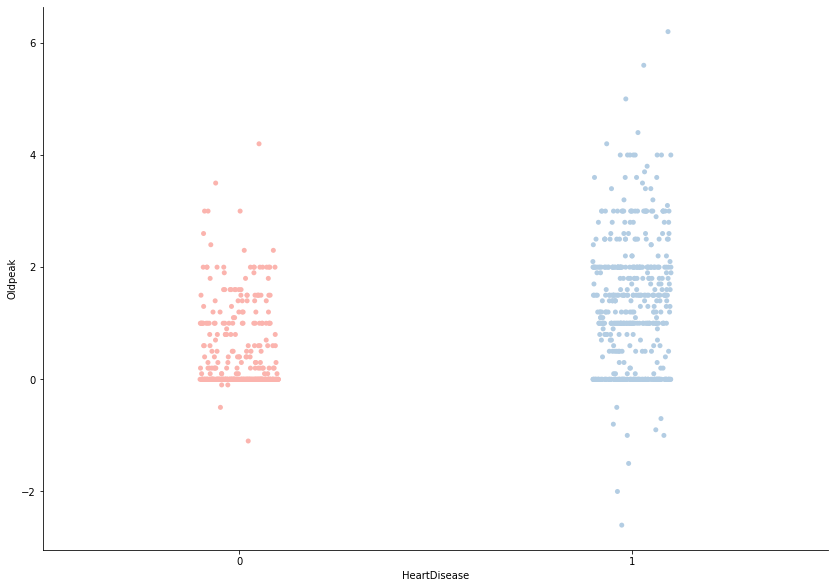

In [73]:
ha = sns.catplot(x="HeartDisease", y="Oldpeak", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

## Splitting Data : Train/Test

In [74]:
y=data['HeartDisease'].values

X=data.drop('HeartDisease',axis=1).values

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Modeling

#### Logistic Regression

In [76]:
import warnings 
warnings.filterwarnings("ignore")

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.85


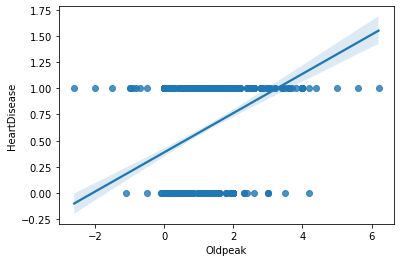

In [78]:
st = sns.regplot(x='Oldpeak', y='HeartDisease', data=data)

#### Knn

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [80]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy = ', accuracy_score(y_pred,y_test))

Accuracy =  0.7010869565217391


#### Optimal K value

In [81]:
n_neighbors = 30
scores = []
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy for k = ',k,' is ',round( accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))


Accuracy for k =  1  is  0.7
Accuracy for k =  2  is  0.7
Accuracy for k =  3  is  0.71
Accuracy for k =  4  is  0.7
Accuracy for k =  5  is  0.7
Accuracy for k =  6  is  0.71
Accuracy for k =  7  is  0.71
Accuracy for k =  8  is  0.7
Accuracy for k =  9  is  0.72
Accuracy for k =  10  is  0.7
Accuracy for k =  11  is  0.72
Accuracy for k =  12  is  0.71
Accuracy for k =  13  is  0.7
Accuracy for k =  14  is  0.72
Accuracy for k =  15  is  0.7
Accuracy for k =  16  is  0.71
Accuracy for k =  17  is  0.71
Accuracy for k =  18  is  0.71
Accuracy for k =  19  is  0.73
Accuracy for k =  20  is  0.71
Accuracy for k =  21  is  0.74
Accuracy for k =  22  is  0.72
Accuracy for k =  23  is  0.71
Accuracy for k =  24  is  0.71
Accuracy for k =  25  is  0.72
Accuracy for k =  26  is  0.71
Accuracy for k =  27  is  0.71
Accuracy for k =  28  is  0.68
Accuracy for k =  29  is  0.72


###### ==> As we can see, the optimal k value with knn method is 18

Text(0, 0.5, 'Testing Accuracy')

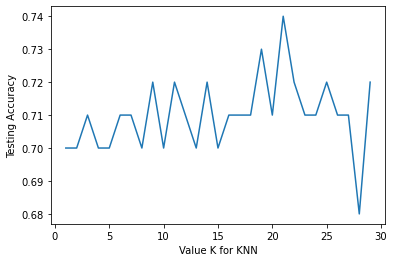

In [82]:
import matplotlib.pyplot as plt
plt.plot(range(1,30), scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

#### Random Forest

In [83]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

iris = datasets.load_iris()

data=pd.DataFrame(
{
    'Age': iris.data[:,0],
    'Sex': iris.data[:,1],
    'ChestPainType': iris.data[:,2],
    'ExerciseAngina': iris.data[:,3],
    'HeartDisease': iris.target
})

X=data[['Age','Sex','ChestPainType','ExerciseAngina']]
y=data['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [84]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9777777777777777


### ==> Conclusion = Random Forest is the best modeling type with 0.98 of accuracy 